In [129]:
import numpy as np
import matplotlib.cm as mplcm
import matplotlib.colors as mplcolors
import matplotlib.pyplot as plt

# Dataset compression
The dataset sizes are reduced by converting the data types to int8. The original data types are float32 / int32.

In [130]:
dataset = "cora"

In [131]:
adj = np.load("../data/" + dataset + "/adj.npy")
np.unique(adj), adj.shape

(array([0, 1], dtype=int8), (2708, 2708))

In [132]:
np.save("../data/" + dataset + "/adj.npy", adj.astype(np.int8))

In [133]:
feat = np.load("../data/" + dataset + "/feat.npy")
np.unique(feat), feat.shape, feat.dtype

(array([0, 1], dtype=int8), (2708, 1433), dtype('int8'))

In [134]:
np.save("../data/" + dataset + "/feat.npy", feat.astype(np.int8))

In [135]:
import networkx as nx

In [151]:
n = 500
g = nx.from_numpy_array(adj[:n, :n])

In [154]:
def draw(self, clusters: list[int] = None, draw_labels: bool = False) -> None:
	"""Draws the graph using the NetworkX draw method. If clusters are provided, the nodes are colored based on the
	clusters based on https://stackoverflow.com/questions/8389636/creating-over-20-unique-legend-colors-using-matplotlib

	:param clusters: List of cluster labels for each node
	:type clusters: list[int]
	:param draw_labels: Boolean flag to indicate if the labels should be drawn
	:type draw_labels: bool
	"""
	if clusters is not None:
		num_colors = max(clusters) + 1
		cm = plt.get_cmap('gist_rainbow')
		cNorm = mplcolors.Normalize(vmin=0, vmax=num_colors - 1)
		scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
		color_map = [scalarMap.to_rgba(i) for i in range(num_colors)]
		colors = [color_map[clusters[i]] for i in range(len(clusters))]
	else:
		colors = "darkgray"
	pos = nx.spring_layout(self, k=.1)
	node_size = 50 if len(self) < 50 else 5
	edge_width = 1 if len(self) < 50 else 1
	nx.draw_networkx_nodes(self, pos, edgecolors="darkgray", linewidths=.5, node_color=colors, node_size=node_size)
	nx.draw_networkx_edges(self, pos, width=edge_width, alpha=0.5, edge_color="gray")
	if draw_labels:
		nx.draw_networkx_labels(self, pos)
	plt.tight_layout()
	plt.axis("off")
	plt.show()

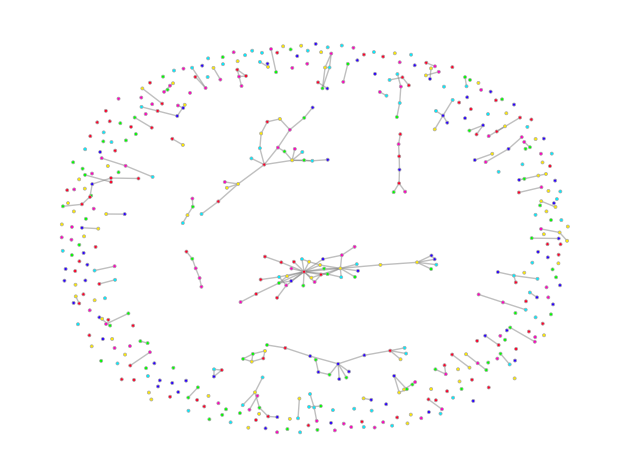

In [155]:
from random import randint

clusters = [randint(0, 5) for _ in range(n)]

draw(g, clusters)